In [2]:
import plotly.plotly as py
import plotly.graph_objs as graph_objs

import cufflinks as cf

import pandas as pd
import numpy as np

import sqlite3
from sqlalchemy import create_engine

In [3]:
pd.set_option('max_columns', 300)

In [4]:
engine = create_engine('sqlite:///liligo.db', echo=False)

In [6]:
pd.read_sql_query('''
    select * from listings limit 1
''', engine)

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2577,https://www.airbnb.com/rooms/2577,20190205040859,2019-02-05,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,None,None,"Metro lines : 4, 8, 3, 11, 9.",None,None,None,None,None,https://a0.muscache.com/im/pictures/09da057c-0...,None,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",within a few hours,80%,None,f,https://a0.muscache.com/im/pictures/17fe6c88-a...,https://a0.muscache.com/im/pictures/17fe6c88-a...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, Île-de-France, France",République,Entrepôt,None,Paris,Île-de-France,75010,Paris,"Paris, France",FR,France,48.869933,2.362511,t,Loft,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",None,$125.00,None,None,$0.00,$40.00,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,3 months ago,t,0,0,0,85,2019-02-05,1,1,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,None,{PARIS},t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.86


In [8]:
pd.read_sql_query('''
    select count(*) as cnt from listings
''', engine)

,cnt
0,58067


In [7]:
pd.read_sql_query('''
    select count(*) as cnt from listings where has_availability = 't'
''', engine)

,cnt
0,58067


In [9]:
pd.read_sql_query('''
    select count(*) as cnt from listings where availability_90 > 0
''', engine)

,cnt
0,26699


In [10]:
pd.read_sql_query('''
    select count(*) as cnt from listings where availability_60 > 0
''', engine)

,cnt
0,24830


In [11]:
pd.read_sql_query('''
    select count(*) as cnt from listings where availability_30 > 0
''', engine)

,cnt
0,22375


In [12]:
pd.read_sql_query('''
    select count(*) as cnt from listings where room_type = 'Entire home/apt'
''', engine)

,cnt
0,50172


# Ratings

In [13]:
pd.read_sql_query('''
    select count(*) as cnt 
    from listings 
    where 1=1
        and room_type = 'Entire home/apt'
        and availability_30 > 0
''', engine)

,cnt
0,18711


In [78]:
(
    pd
    .read_sql_query('''
        select review_scores_rating, count(*) as cnt 
        from listings 
        where 1=1
            and room_type = 'Entire home/apt'
            and availability_30 > 0
            and review_scores_rating > 0
        group by review_scores_rating
        order by review_scores_rating
    ''', engine)
    .set_index('review_scores_rating')
    #.cumsum()
    [80:]
    .iplot(kind = 'bar', filename = 'paris_scores_distribution')
)

In [79]:
(
    pd
    .read_sql_query('''
        select 
              (cast(price_usd/10 as int) + 1) * 10 as price
            , count(*) as cnt 
        from listings 
        where 1=1
            and room_type = 'Entire home/apt'
            and availability_30 > 0
            and review_scores_rating > 0
        group by (cast(price_usd/10 as int) + 1) * 10
        order by price
    ''', engine)
    .set_index('price')
    #.cumsum()
    .loc[:200, :]
    .iplot(kind = 'bar', filename = 'paris_prices_distribution')
)

In [77]:
(
    pd
    .read_sql_query('''
        select 
              price_usd as price
            , review_scores_rating
            , count(*) as cnt
        from listings 
        where 1=1
            and room_type = 'Entire home/apt'
            and availability_30 > 0
            and review_scores_rating > 80
            and price_usd < 200
        group by
              price_usd
            , review_scores_rating
    ''', engine)
    .iplot(kind = 'bubble', x = 'price', y = 'review_scores_rating', size = 'cnt', filename = 'paris_price_rating_distribution')
)

In [8]:
price_scores = (
    pd
    .read_sql_query('''
        select 
              price_usd as price
            , review_scores_rating as scores
        from listings 
        where 1=1
            and room_type = 'Entire home/apt'
            and availability_30 > 0
            and review_scores_rating > 80
            and price_usd < 200
    ''', engine)
)

In [9]:
price_scores.head()

,price,scores
0,115.0,93.0
1,115.0,94.0
2,90.0,100.0
3,85.0,88.0
4,79.0,89.0


In [10]:
price_scores.count()

price     12380
scores    12380
dtype: int64

In [11]:
price_scores['price'].corr(price_scores['scores'])

0.11104075794148578

In [17]:
price_scores_with_cleaning = (
    pd
    .read_sql_query('''
        select 
              price_usd + cleaning/3 as price
            , review_scores_rating as scores
        from listings 
        where 1=1
            and room_type = 'Entire home/apt'
            and availability_30 > 0
            and review_scores_rating > 80
            and price_usd < 200
    ''', engine)
)

In [18]:
price_scores_with_cleaning.head()

,price,scores
0,127.000000,93.0
1,131.666667,94.0
2,90.000000,100.0
3,105.000000,88.0
4,87.333333,89.0


In [19]:
price_scores_with_cleaning['price'].corr(price_scores_with_cleaning['scores'])

0.08950127179722778

In [20]:
price_scores_neigh = (
    pd
    .read_sql_query('''
        select 
              price_usd as price
            , review_scores_rating as scores
            , neighbourhood_cleansed as neighbourhood
        from listings 
        where 1=1
            and room_type = 'Entire home/apt'
            and availability_30 > 0
            and review_scores_rating > 80
            and price_usd < 200
    ''', engine)
)

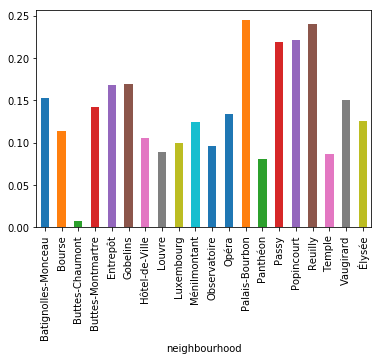

In [32]:
price_scores_neigh.groupby('neighbourhood')[['price', 'scores']].corr().iloc[0::2][['scores']].unstack().scores.price.plot(kind = 'bar')